<a href="https://colab.research.google.com/github/arturbernardo/data_stars/blob/main/vizier_ja%2Ba616a10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyvo
!pip install mocpy
!pip install astropy
!pip install ipyaladin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.9 MB/s eta 0:00:00


In [6]:
# Access astronomical databases
from pyvo import registry  # version >=1.6

# Moc and HEALPix tools
from mocpy import MOC

# Coordinates manipulation
from astropy.coordinates import SkyCoord

# Sky visualization
from ipyaladin import Aladin  # version >=0.4.0

# For plots
import matplotlib.pyplot as plt


# Welcome to VizieR example workflow

[![Vizier](https://custom-icon-badges.demolab.com/badge/Vizier-gray.svg?logo=vizier&logoColor=orange&logoWidth=20)](https://vizier.cds.unistra.fr/viz-bin/VizieR "https://vizier.cds.unistra.fr/viz-bin/VizieR")

**Notes:**

It is a generic notebook, highlighting what can be done once you chose a catalog. This workflow is suggested by [CDS](https://cdsweb.unistra.fr/) (Strasbourg Astronomical Data Center, house of [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR)).

The notebook exploits [pyVO](https://pyvo.readthedocs.io/en/latest/), an advanced library  of The [Virtual Observatory](https://ivoa.net/).

[Astroquery](https://astroquery.readthedocs.io/en/latest/vizier/vizier.html) (not used here) is a well-documented, user-friendly alternative.

--------------------------------------------------------

## 1. Setup

This example notebook has the following dependencies:

**Required**
- pyvo : this library facilitates the access to the Virtual Observatory (VO) resources. VizieR is part of the VO.
This notebook needs version >=1.4.1
**Optional, for visualization**
- ipyaladin : this is the Aladin-lite sky viewer, bundled as a jupyter widget. It allows to plot catalogs and multi-order coverages (MOC)
- matplotlib : an other option to see catalog points and MOCs

## 2. Metadata exploration with the Virtual Observatory registry

This part uses [pyvo](https://pyvo.readthedocs.io/en) to connect to the VO registry.

In [7]:
# the catalogue name in VizieR
CATALOGUE = "J/A+A/616/A10"

We first retrieve the catalogue information.

In [8]:
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [9]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

46 open clusters GaiaDR2 HR diagrams
Short Name: J/A+A/616/A10
IVOA Identifier: ivo://cds.vizier/j/a+a/616/a10
Access modes: conesearch, tap#aux, web
- tap#aux: http://tapvizier.cds.unistra.fr/TAPVizieR/tap
- webpage: http://vizier.cds.unistra.fr/viz-bin/VizieR-2?-source=J/A+A/616/A10
- conesearch: https://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/A+A/616/A10/tablea1a?, description: Cone search capability
 for table J/A+A/616/A10/tablea1a (Stars in nine open clusters within 250pc)
- conesearch: https://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/A+A/616/A10/tablea1b?, description: Cone search capability
 for table J/A+A/616/A10/tablea1b (Stars in 37 open clusters beyond 250pc)
- conesearch: https://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/A+A/616/A10/tablea3?, description: Cone search capability
 for table J/A+A/616/A10/tablea3 (Mean parameters for clusters within 250pc)
- conesearch: https://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/A+A/616/A10/tablea4?, description: Cone s

We can also inspect in details the `resource` object and access the attributes not provided by the describe method. See for example, the first author of a resource:

In [10]:
voresource.creators[0]

'Gaia Collaboration'

## 3. Access the tabular data of this catalog

We can have a look at the tables available in the catalogue.

In [11]:
tables = voresource.get_tables()
print(f"In this catalogue, we have {len(tables)} tables.")
for table_name, table in tables.items():
    print(f"{table_name}: {table.description}")

In this catalogue, we have 4 tables.
J/A+A/616/A10/tablea1a: Stars in nine open clusters within 250pc
J/A+A/616/A10/tablea1b: Stars in 37 open clusters beyond 250pc
J/A+A/616/A10/tablea3: Mean parameters for clusters within 250pc
J/A+A/616/A10/tablea4: Mean parameters for clusters beyond 250pc


In [12]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['J/A+A/616/A10/tablea1a',
 'J/A+A/616/A10/tablea1b',
 'J/A+A/616/A10/tablea3',
 'J/A+A/616/A10/tablea4']

The actual data can then be accessed using any of the ``access_modes`` of the voresource.

In [13]:
voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

The web access is found by following the ``reference_url``

In [14]:
voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/616/A10'

### 3.1 Execute a SQL/ADQL query

The ``tap#aux`` in the ``access_mode`` response indicates that we can also do a SQL/ADQL query for these VizieR tables.

On the first table of the catalogue, we execute an <a href='https://www.ivoa.net/documents/latest/ADQL.html'>ADQL</a> query.

In [15]:
# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = tap_service.search(
    f'select TOP 10 * from "{first_table_name}"',
)
tap_records

<DALResultsTable length=10>
recno       Source      Cluster  RAdeg    DEdeg     Gmag    plx    e_plx    _RA      _DE   
                                  deg      deg      mag     mas     mas     deg      deg   
int32       int64        object float64  float64  float64 float64 float64 float64  float64 
----- ----------------- ------- -------- -------- ------- ------- ------- -------- --------
  254 36629890579758592  Hyades 58.14384 11.26075  12.626  28.593   0.012 58.14306 11.26079
  494 38329666836450304  Hyades 59.56042 12.62797  15.111  21.914   0.046 59.55985 12.62802
  493 38354680725946240  Hyades 58.75658 12.48554   9.766  21.715   0.015 58.75601 12.48559
  503 38670343642226816  Hyades 58.44438 13.39193  14.832  24.163   0.025 58.44372 13.39199
  504 38929141191925760  Hyades 60.18786 13.90626   13.33  21.594   0.065  60.1873 13.90633
  394 39305036729495936  Hyades   60.926 14.99122  15.039    24.1   0.041 60.92537 14.99133
  495 40470720915966208  Hyades 58.72235 16.31552  1

<!-- section position -->

We will explore the other access modes here.

### 3.2. Execute a cone search query

We use the Simple Cone Search (<a href='https://www.ivoa.net/documents/latest/ConeSearch.html'>SCS</a>) protocol of the virtual observatory (only available for tables with positions).

Finding the conesearch service that you want to use (there is usually one per table):

Let's use the first one for this example.

In [19]:
# we get the conesearch  service associated to the first table
conesearch_interface = voresource.get_interface(service_type='conesearch',
                                                keyword='J/A+A/616/A108/catalog',
                                                lax=True)
# if you get a TypeError about an unexpected keyword, check that you installed pyvo>=1.6
conesearch_service = conesearch_interface.to_service()

IndexError: list index out of range

We adapt the radius and position of the center to our needs:

In [17]:
conesearch_radius = 1 / 60.0  # in degrees
conesearch_center = (58.161621, 11.262980)

In [18]:
conesearch_records = conesearch_service.search(
    pos=conesearch_center,
    sr=conesearch_radius,
)
conesearch_records

NameError: name 'conesearch_service' is not defined

## 4. Get the catalogue coverage

VizieR also provides the coverage of each catalogue with Multiple Order Coverage (<a href='https://ivoa.net/documents/MOC/'>MOC</a>) at order 10 -- meaning with a 0.001 rad spacial resolution.

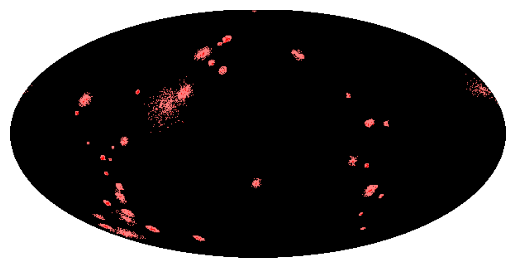

In [20]:
# retrieve the MOC
catalogue_coverage = MOC.from_vizier_table(CATALOGUE)
catalogue_coverage.display_preview()

The quick preview is the whole sky in equatorial coordinates. Red represent zones where the catalog has data, black areas are empty zones.

We can also plot the coverage with ``matplotlib``.

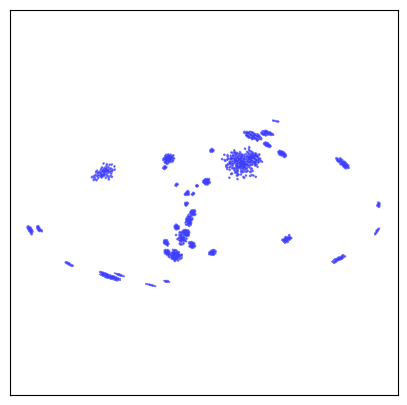

In [21]:
fig = plt.figure(figsize=(5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection=wcs)
catalogue_coverage.fill(ax=ax, wcs=wcs, alpha=0.5, color="blue")

or with [ipyaladin](https://github.com/cds-astro/ipyaladin)

In [22]:
aladin = Aladin()
aladin

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget.py:672: DeprecationWarning: Deprecated in traitlets 4.1, use the instance .metadata dictionary directly, like x.metadata[key] or x.metadata.get(key, default)
  if trait.get_metadata('sync'):
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


Aladin()

We switch the target to the center of the conesearch

In [ ]:
aladin.target = "58.161621 +11.262980"

We can add the tables and coverage in this ipyaladin widget:

In [ ]:
aladin.add_table(conesearch_records.to_table(), color="lightskyblue", shape="plus")

If you don't see the points from the conesearch result, try zooming in the widget with your mouse wheel.

We can also add the result of the TAP query:

In [ ]:
aladin.add_table(tap_records.to_table())

In [ ]:
aladin.add_moc(
    catalogue_coverage,
    fill=True, opacity=0.5, color="pink", edge=True
)

For more information about manipulating multi-order coverages, see [MOCpy documentation](https://cds-astro.github.io/mocpy/), and about using the `ipyaladin` widget, see [its documentation](https://cds-astro.github.io/ipyaladin/).